The distribution of the sample of Social support values does not look to be normally distributed and the test for normality shows that the data is not normally distributed. There are ways of transforming variable to make them normally distributed. Alternatively nonparametric statistical methods can be used instead of parametric methods.

I will try using the bootstrap resampling method which is a non-parametric way of simulating data using resampling or sampling with replacement. 

>Bootstrapping is the practice of estimating properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed dataset (and of equal size to the observed dataset). 
The basic idea of bootstrapping is that inference about a population from sample data can be modelled by resampling the sample data and performing inference about a sample from resampled data. As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.
[Wikipedia wiki on Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))


Bootstrapping is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples. Samples are constructed by drawing observations from a large data sample one at a time and then returning the observation so that it could be drawn again. Therefore any given observation could be included in the sample more than once while some observations might never be drawn. 

Again [machinelearningmastery.com](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) has a blog post on this and outlines the steps:

The process for building one sample is:
- choose the size of the sample
- While the size of the sample is less than the chosen size
    1. Randomly select an observation from the dataset
    2. Add it to the sample
The number of repetitions must be large enough that meaningful repetitions can be calculated on the sample.


Based on the information I will attempt to use sampling with replacement or bootstrapping to simulate the Social support variable.
Here I will use the sample size the same as the original dataset which is 136 observations. [numpy.random.choice](https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html#numpy-random-choice) function can be used for this purpose.

The mean of the Social support variable in the dataset can be considered as a single estimate of the mean of the population of social support while the standard deviation is an estimate of the variability.

The simplest bootstrap method would involve taking the original data set of N(136) Social support values and sampling from it to form a new sample  - the 'resample' or bootstrap sample that is also of size 136. 
If the bootstrap sample is formed using sampling with replacement from the original data sample withb a large enough size then there should be very little chance that the bootstrap sample will be the exact same as the original sample. This process is repeated many times (thousands) and the mean  computed for each bootstrap sample to get the bootstrap estimates which can then be plotted on a histogram which is considered an estimate of the shape of the distribution.

In [181]:
len(dfh['Social support'])

136

### Simulate Social support using resampling / bootstrap method.

The [Machinelearningmastery.com blogpost on bootstrap](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) outlines how to implement the bootstrap method using the[scikit-learn resample function](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) which takes as arguments the data array, whether or not to sample with replacement, the size of the sample, and the seed for the pseudorandom number generator used prior to the sampling.
I will apply this method below to the Social support variable and plot the results. I will also just use the `numpy.random.choice` function and see how they compare.

https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60

In [77]:
# adapted from https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
# import resample function
from sklearn.utils import resample
# provide Social support data to the function
data=dfh['Social support']
# specify using replacement, set the size of the sample
boot = resample(data, replace=True, n_samples=136, random_state=1)
print('Bootstrap Sample: %s' % boot)
# gather the out of bag observations
oob = [x for x in data if x not in boot]
#print('OOB Sample: %s' % oob)


Bootstrap Sample: 487     0.922379
933     0.817930
1671    0.684800
1010    0.738480
          ...   
1093    0.829381
610     0.940971
1486    0.621303
859     0.781230
Name: Social support, Length: 136, dtype: float64


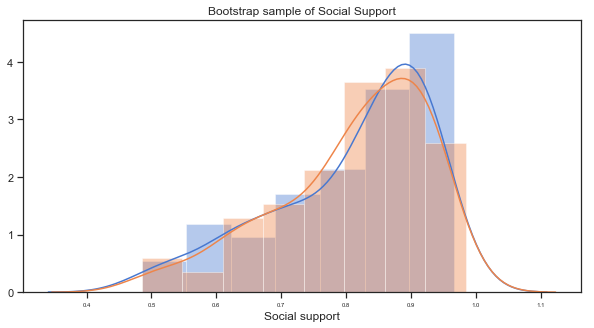

In [270]:
sns.distplot(boot, label="bootstrapped sample");
plt.title("Bootstrap sample of Social Support");
sns.distplot(dfh['Social support'], label="Social support 2018");


In [147]:
print(f" The mean of the Social support sample dataset for 2018 is {dfh['Social support'].mean()} ")
print(f" The standard deviation is {dfh['Social support'].std()} ")
dfh.shape

 The mean of the Social support sample dataset for 2018 is 0.8105441362542265 
 The standard deviation is 0.11633213261117184 


(136, 7)

### Sampling with replacement using np.random.choice:
Here I use a loop to draw multiple random samples with replacements from the dataset. 

Additionally the means for each sample can be calculated and then all the means from the different samples are plotted to show their distribution.
A bootstrapped mean and confidence interval is then calculated. 
This is not really what I need here. This is estimating a quantity such as the mean of the population.


I am following this [blogpost on bootstrap method](https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60) here:

In [83]:
# using the Social support data from the dataset.
social=dfh['Social support']
# create sample by resampling from social
sample = np.random.choice(social, size=30)
sample

# bootstrap for mean
boot_means = []
for _ in range(10000):
    bootsample = np.random.choice(sample,size=30, replace=True)
    boot_means.append(bootsample.mean())
    
# simulated mean of mean
bootmean = np.mean(boot_means)

# simulated standard deviation of mean
bootmean_std = np.std(boot_means)

# simulated mean VS true mean
print(social.mean(), bootmean)

# the theorical standard error and simulated standard error
print(social.std()/(30 ** 0.5), bootmean_std)

0.8105441362542265 0.8129457886918386
0.021239244397940393 0.021761630798886464


Bootstrapped Mean Length = 0.8087618714456276, 95% CI = [0.7903 0.8243]


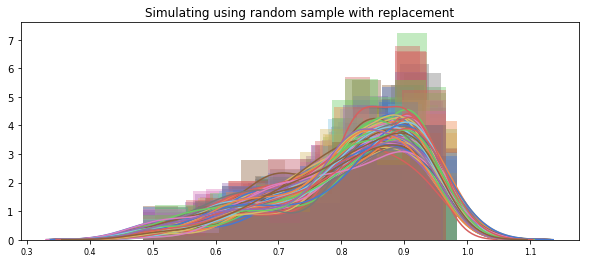

In [175]:
# adapted from datacamp
# using the Social support data from the dataset.
social=dfh['Social support']
# create a list to store the means of the samples, set the number of simulations
mean_social_sim, sims = [], 136
# use loop to create 100 samples - takes very long to do 1000 
for i in range(sims):
    # draw a random sample from social with replacement and store it in social_sample
    social_sample=np.random.choice(social, replace=True, size=len(social))
    # calculate the mean of each sample
    sns.distplot(social_sample)
    plt.title("Simulating using random sample with replacement")
    sample_mean = np.mean(social_sample)
    # append the mean of each sample to mean_social
    mean_social_sim.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_social_sim)
boot_95_ci = np.percentile(mean_social_sim, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))


In [184]:
dfh['Social support'].describe()

count    136.000000
mean       0.810544
std        0.116332
min        0.484715
25%        0.739719
50%        0.836641
75%        0.905608
max        0.984489
Name: Social support, dtype: float64

In [178]:
social_sample.shape

(136,)

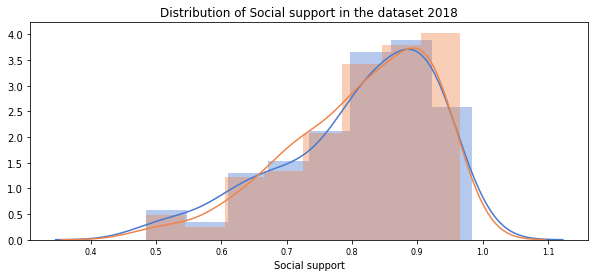

In [179]:
sns.distplot(social)
plt.title("Distribution of Social support in the dataset 2018");
sns.distplot(social_sample);

#### Compare the results of the simulation to the actual data:

In [134]:
print("Samples from the simulation")
print(f"mean: {social_sample.mean()}")
print(f" min :{social_sample.min()}")
print(f" max: {social_sample.max()}")
print(f"standard dimeviation:{social_sample.std()}")
print(f"{len(social_sample)}")

Samples from the simulation
mean: 0.8046756399904981
 min :0.4847152233123779
 max: 0.9659619331359864
standard dimeviation:0.11868641825857511
136


Using T-test to check if the actual sample and the simulated data come from the same distribution.
Here I am only using a single simulated sample for now.

In [135]:
# Using Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(social_sample, df18['Social support'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')



stat=-0.411, p=0.681
Probably the same distribution
